# Packet Queuing and Dropping in Router (40634-1 Sharif UT, Spring 2023)
Authors: **Mahdi Jafari(98109612), Ashkan Khademian(98105738)**

Course Info: **Computer Simulation, 40634-1 SUT** ([course page](https://docs.ce.sharif.edu/%D8%AF%D8%B1%D8%B3/%DB%B4%DB%B0%DB%B6%DB%B3%DB%B4))\
<b>Course Project</b>

<div style="direction:rtl;line-height:300%;text-align:justify;" align="justify"><font face="XB Zar" size=3>
<font color=#008B8B size=5>
<p></p>
<b>نطق ۱: مستندات کد</b>
</font>
<hr>
<li>
ماژول
<code>packet</code>:
این ماژول کلاس <code>packet</code> را پیاده می‌کند که تنها وظیفه نگه‌داری جزئیات یک <code>packet</code> مثل زمان ورود، اولویت و ... است.
</li>
<li>
ماژول <code>customqueue</code>: در این ماژول کلاس‌های انواع صف‌ها پیاده شده‌است که به شرح زیرند:
    <ul>
    <li><code>AbstractQueue</code>: کلاس پایه برای صف‌ها</li>
    <li><code>FIFOQueue</code>: کلاس یک صف عادی FIFO. برای پیاده‌سازی این کلاس از یک <code>deque</code> استفاده می‌کنیم و تسک‌ها را به ترتیب اضافه شدن در آن می‌ریزیم و برای <code>pop</code> از ابتدای این <code>deque</code> برمیداریم.</li>
    <li><code>WRRQueue</code>: این کلاس برای پیاده‌سازی Weighted Round Robin می‌باشد. در آن ۳ صف <code>FIFOQueue</code> و وزن‌های هرکدام را نگه می‌داریم و در زمان اضافه‌شدن با توجه به اولویت پکت، در صف متناظرش آن را اضافه می‌کنیم. در زمان <code>pop</code> با توجه به وزن‌ها به ترتیب از هر صف <code>pop</code> می‌کنیم.</li>
    <li><code>NPPSQueue</code>: در این کلاس صف اولویت‌دار را پیاده می‌کنیم. یک لیست نگه می‌داریم که در آن پکت‌ها به ترتیب اولویت نزولی هستند. در زمان اضافه شدن این ترتیب را حفظ می‌کنیم و در زمان <code>pop</code> از ابتدای این لیست برمی‌داریم.</li>
    </ul>
</li>
<li>
ماژول <code>scheduler</code>: این ماژول کلاس اصلی <code>Scheduler</code> را پیاده می‌کند. این کلاس متغیرهای سیستم را ورودی می‌گیرد و سپس شبیه‌سازی را انجام می‌دهد. در این ماژول همچنین دو کلاس <code>Event</code و <code>EventSet</code> نیز پیاده شده‌اند که کلاس اول نشان‌دهنده یک اتفاق (ورود به سیستم، خروج از سیستم) برای یک پکت است و کلاس دوم وظیفه مرتب نگه‌داشتن تمام <code>Event</code> را دارد. در <code>Scheduler</code>، <code>Event</code>ها ساخته می‌شوند و در <code>EventSet</code> ریخته می‌شوند تا فرآیند شبیه‌سازی انجام گیرد.
</li>
<li>
ماژول <code>stats</code>: این ماژول کلاس لازم برای تولید مقادیر آماری روی یک <code>Scheduler</code> را داراست.
در واقع با این ماژول رفتار و عملیات مورد نیاز برای تولید مقادیر آماری در طی روشن بودن شبیه‌ساز از کلاس <code>Scheduler</code> به کلاس <code>SchedulerStats</code> تفویض شده است.
</li>
<li>
ماژول <code>queue_observer</code>: این ماژول یک <a href="https://en.wikipedia.org/wiki/Observer_pattern">observer</a> روی ماژول <code>customqueue</code> می‌باشد. مقادیر مختلفی که توسط این ماژول observer نگاه داشته می‌شوند بعدتر در ماژول <code>stats</code> به منظور تولید لاگ یا نمودار استفاده خواهند شد.
    <ul>
    <li><code>QueueObserver</code>: اینترفیس برای observe کردنِ صف‌ها</li>
    <li><code>QueueHistoryObserver</code>: این observer تمامی بسته‌هایی که زمانی وارد یک صف می‌شوند را نگهداری می‌کند (حتی اگر در نهایت این بسته‌ها از صف برداشته شوند)</li>
    <li><code>QueueLengthObserver</code>: این observer طول صف را مدت زمان شبیه‌سازی مانیتور می‌کند.</li>
    </ul>
</li>
</ul>
</div>

<div style="direction:rtl;line-height:300%;text-align:justify;" align="justify"><font face="XB Zar" size=3>
<font color=#008B8B size=5>
<p></p>
<b>نطق ۲: راه‌اندازی</b>
</font>
<hr>
در ادامه ابتدا import های لازم صورت می‌گیرد سپس پارامتر‌های ورودی مساله قرار گرفته‌اند. با تغییر این پارامتر‌ها خروجی‌های متنوع حاصل خواهد شد.
</div>

In [16]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [17]:
from customqueue import WRRQueue, FIFOQueue, NPPSQueue
from scheduler import Scheduler
from stats import SchedulerStats
from queue_observer import QueueHistoryObserver, QueueLengthObserver

In [18]:
# Parameters
X = 2
Y = 1.5
T = 30
PROCESSORS_NUM = 1
LENGTH_LIMIT = [10, 15, 11]  # first is for lowest priority queue
WRR_WEIGHTS = [1, 2, 3]  # first is for lowest priority queue
PRIORITY_PROBS = [0.5, 0.3, 0.2]

<div style="direction:rtl;line-height:300%;text-align:justify;" align="justify"><font face="XB Zar" size=3>
<font color=#008B8B size=5>
<p></p>
<b>نطق ۳: شبیه‌سازی</b>
</font>
<hr>
در ادامه در سه زیربخش هر یک از صف‌های Weighted Round Robin، FIFO و Non-Preemptive Priority Scheduling راه اندازه و خروجی حاصل از شبیه‌سازی هر کدام نمایش داده می‌شود.
</div>

<div style="direction:rtl;line-height:300%;text-align:justify;" align="justify"><font face="XB Zar" size=3>
<font color=#008B8B size=4>
<p></p>
<b>نطق ۳.۱: Weighted Round Robin Queue</b>
</font>
</div>

Long-time-average of queue lengths
--------------------------
	L for (FIFO Queue: Size = 10): 6.376556960044525
	L for (FIFO Queue: Size = 15): 5.350440768507385
	L for (FIFO Queue: Size = 11): 2.056142114561594
Average waiting time in all queues = 11.03569554668826
Average waiting time in each queue:
--------------------------
	W_Q for (FIFO Queue: Size = 10): 16.479777178601985
	W_Q for (FIFO Queue: Size = 15): 11.532802276808589
	W_Q for (FIFO Queue: Size = 11): 5.186713870411991
Processors utilizations
--------------------------
processor #0: ρ = 0.8348913172257331
#Dropped packets = 12


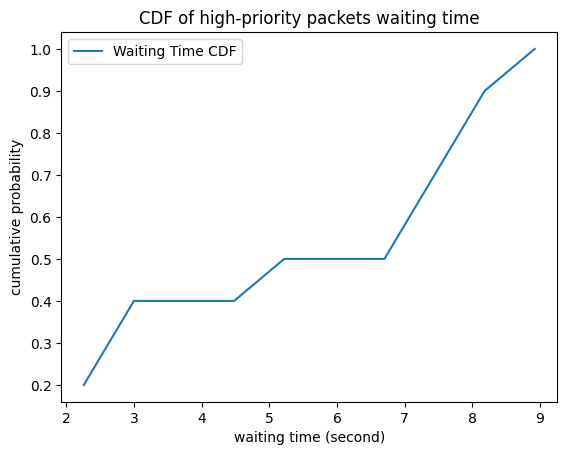

In [19]:
queues = [FIFOQueue(l) for l in LENGTH_LIMIT]
for q in queues:
    q.register_observer([QueueHistoryObserver(), QueueLengthObserver()])

scheduler = Scheduler(
    queue=WRRQueue(
        queues=queues,
        weights=WRR_WEIGHTS,
    ),
    x=X,
    y=Y,
    t=T,
    processors=PROCESSORS_NUM,
    priority_probs=PRIORITY_PROBS,
)
scheduler.run()
SchedulerStats(scheduler).configured_log()

<div style="direction:rtl;line-height:300%;text-align:justify;" align="justify"><font face="XB Zar" size=3>
<font color=#008B8B size=4>
<p></p>
<b>نطق ۳.۲: FIFO Queue</b>
</font>
</div>

Long-time-average of queue lengths
--------------------------
	L for (FIFO Queue: Size = 10): 7.128774804855059
Average waiting time in all queues = 8.76409342685555
Average waiting time in each queue:
--------------------------
	W_Q for (FIFO Queue: Size = 10): 8.218190166345183
Processors utilizations
--------------------------
processor #0: ρ = 0.8208124948290398
#Dropped packets = 40


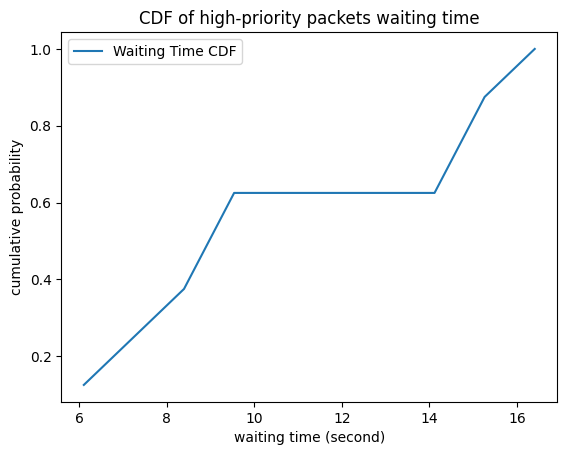

In [20]:
queue = FIFOQueue(length_limit=LENGTH_LIMIT[0])
queue.register_observer([QueueHistoryObserver(), QueueLengthObserver()])
scheduler = Scheduler(
    queue=queue,
    x=X,
    y=Y,
    t=T,
    processors=PROCESSORS_NUM,
    priority_probs=PRIORITY_PROBS,
)
scheduler.run()
SchedulerStats(scheduler).configured_log()

<div style="direction:rtl;line-height:300%;text-align:justify;" align="justify"><font face="XB Zar" size=3>
<font color=#008B8B size=4>
<p></p>
<b>نطق ۳.۳: Non-Preemptive Priority Scheduling Queue</b>
</font>
</div>

Long-time-average of queue lengths
--------------------------
	L for (Non-preemptive Priority Scheduling Queue: Size=10): 8.040716419950947
Average waiting time in all queues = 8.057581561198518
Average waiting time in each queue:
--------------------------
	W_Q for (Non-preemptive Priority Scheduling Queue: Size=10): 7.0577746706860935
Processors utilizations
--------------------------
processor #0: ρ = 0.944393342107114
#Dropped packets = 26


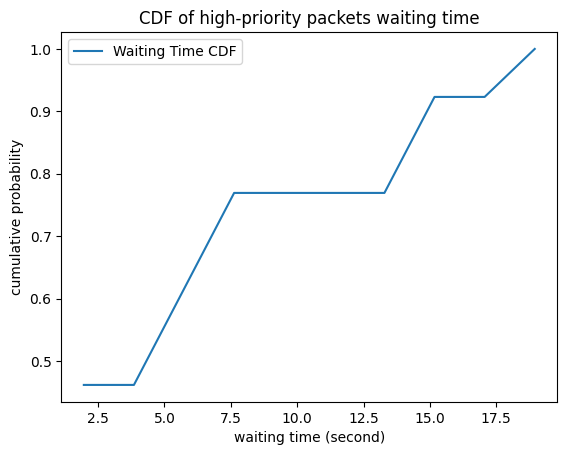

In [21]:
queue = NPPSQueue(length_limit=LENGTH_LIMIT[0])
queue.register_observer([QueueHistoryObserver(), QueueLengthObserver()])
scheduler = Scheduler(
    queue=queue,
    x=X,
    y=Y,
    t=T,
    processors=PROCESSORS_NUM,
    priority_probs=PRIORITY_PROBS,
)
scheduler.run()
SchedulerStats(scheduler).configured_log()